In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset from the specified file path
file_path = "/home/uta/Coding/Machine Learning/iot_telemetry_data.csv"
df = pd.read_csv(file_path)

# Column names
print("Column names:", df.columns)

Column names: Index(['ts', 'device', 'co', 'humidity', 'light', 'lpg', 'motion', 'smoke',
       'temp'],
      dtype='object')


In [34]:
# Calculate mean, median and mode of humidity column
print("Mean Humidity:", df['humidity'].mean())
print("Median Humidity:", df['humidity'].median())
print("Mode Humidity:", df['humidity'].mode()[0])

Mean Humidity: 60.511693961575894
Median Humidity: 54.9
Mode Humidity: 51.7


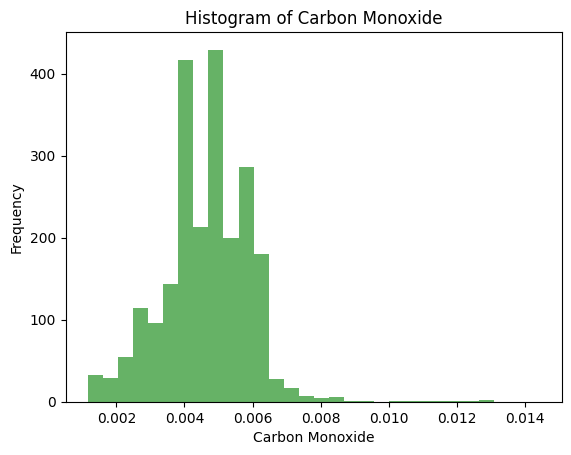

In [35]:
# Normal Dristribution of Carbon Monoxide
plt.hist(df['co'], bins=30, density=True, alpha=0.6, color='g')
plt.xlabel('Carbon Monoxide')
plt.ylabel('Frequency')
plt.title('Histogram of Carbon Monoxide')
plt.show()

In [36]:
# Sample 100 data points from the temperature column
sample_quality = df['humidity'].sample(n=100, random_state=1)
mean_quality_estimation = sample_quality.mean()
print("Mean quality estimation:", mean_quality_estimation)

Mean quality estimation: 60.616000068664555


In [37]:
# T-test
sample_high_quality = df[df['humidity'] > 60.51]['temp']
sample_low_quality = df[df['humidity'] <= 60.51]['temp']
stat, p = ttest_ind(sample_high_quality, sample_low_quality)
if p < 0.05:
    print("There is a significant difference between the two groups.")
else:
    print("There is no significant difference between the two groups.")

There is a significant difference between the two groups.


In [38]:
# Calculate Variance and Standard Deviation of Carbon Monoxide
print("Carbon Monoxide Variance:", df['co'].var())
print("Carbon Monoxide Standard Deviation:", df['co'].std())

Carbon Monoxide Variance: 1.562565709404298e-06
Carbon Monoxide Standard Deviation: 0.0012500262834853905


Mean Squared Error: 6.025864904751914e-12
R-squared: 0.9999996389128478


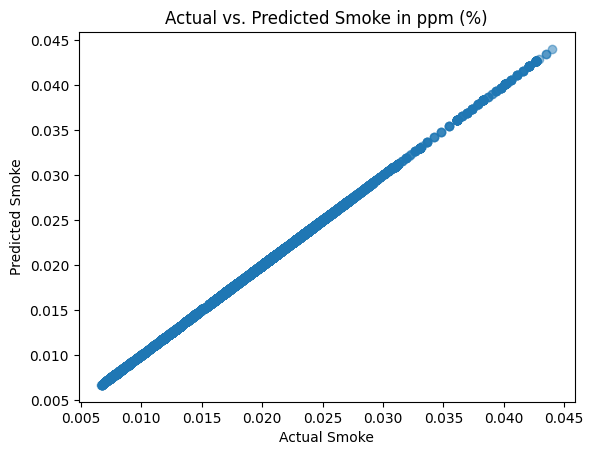

In [40]:
# Linear Regression
X = df.drop(['smoke', 'device'], axis=1)
y = df['smoke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Smoke")
plt.ylabel("Predicted Smoke")
plt.title("Actual vs. Predicted Smoke in ppm (%)")
plt.show()